# Evaluate on Tennis Court Dataset
Evaluate performance using `model.predict()`

In [7]:
import os
from ultralytics import YOLO
import random
from utils import plot_keypoints_file, detect_lines, flatten_perspective, plot_lines, plot_keypoints
import matplotlib.pyplot as plt
import cv2
import numpy as np

## Prediction with retrained YoloV8 Only

In [8]:
model = YOLO('runs/pose/train2/weights/best.pt')  # initialize
print(model)

YOLO(
  (model): PoseModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=

In [9]:

# Dataset
dataset_path = "datasets/tennis_data"
images = dataset_path + "/images/train"
labels = dataset_path + "/labels/train"

# Select 5 random images from the training set
images_list = os.listdir(images)
random.shuffle(images_list)
images_list = images_list[:5]
images_list = [images + "/" + image for image in images_list]

# Make predictions
results = model.predict(images_list, save=True, save_conf=True, save_txt=True)


0: 384x640 1 tennis court, 1: 384x640 1 tennis court, 2: 384x640 1 tennis court, 3: 384x640 1 tennis court, 4: 384x640 1 tennis court, 156.2ms
Speed: 1.0ms preprocess, 31.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/pose/predict2
5 labels saved to runs/pose/predict2/labels


In [10]:
print(results)
print(results[0].keypoints)

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: ultralytics.engine.results.Keypoints object
masks: None
names: {0: 'tennis court'}
orig_img: array([[[  0,   0,   0],
        [ 19,   1,   6],
        [ 11,   0,   0],
        ...,
        [  6,   0,   0],
        [ 37,  25,  27],
        [ 11,   0,   1]],

       [[ 48,  30,  35],
        [ 94,  76,  81],
        [ 97,  79,  84],
        ...,
        [ 99,  87,  89],
        [135, 123, 125],
        [ 75,  63,  65]],

       [[ 70,  54,  59],
        [142, 126, 131],
        [155, 139, 144],
        ...,
        [191, 183, 185],
        [199, 191, 193],
        [ 87,  79,  81]],

       ...,

       [[ 14,  10,  77],
        [ 58,  54, 121],
        [ 47,  57, 127],
        ...,
        [ 42,  59, 136],
        [ 36,  65, 101],
        [  0,  21,  57]],

       [[ 15,  11,  78],
        [ 59,  55, 122],
        [ 48,  58, 128],
        ...,
        [ 42,  59, 136],
  

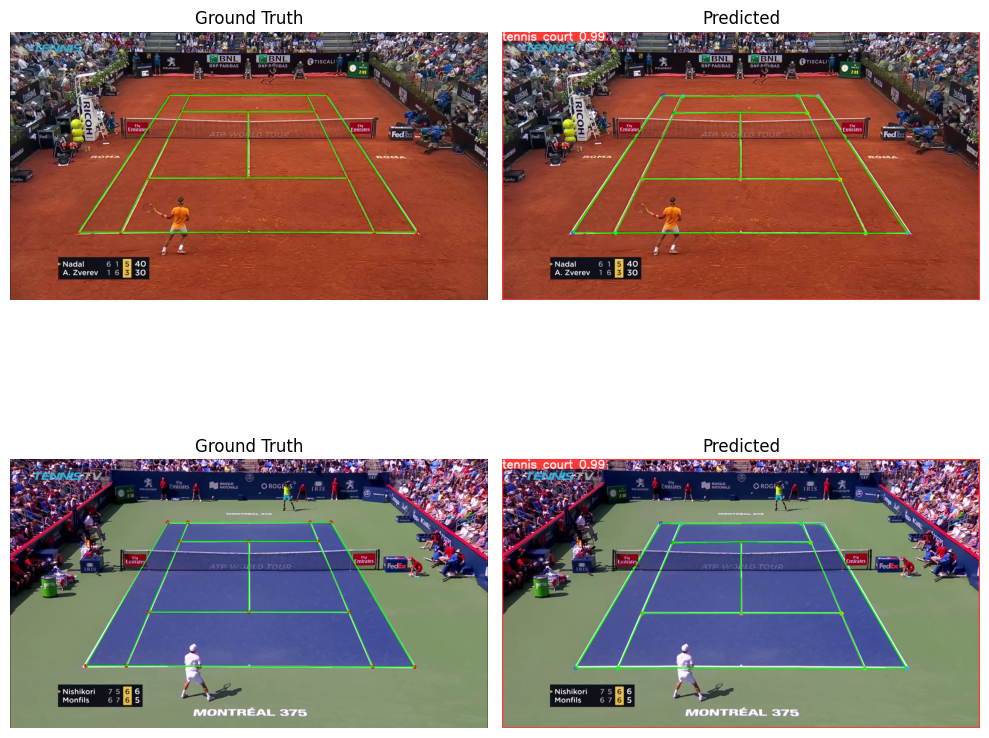

In [26]:
# Get original path of images
pred_images_orig_path = [result.path for result in results]
pred_images_save_dir = [result.save_dir for result in results]
# Predicted keypoints

def tensor_to_tuples(tensor):
    numpy_array = tensor.squeeze(0).numpy()
    numpy_array = np.c_[numpy_array, np.ones((numpy_array.shape[0], 1)) * 2]
    return numpy_array.tolist()

pred_keypoints = [tensor_to_tuples(result.keypoints.xyn) for result in results]

# Matplotlib predicts vs ground truth
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i in range(2):
    orig_image_path = pred_images_orig_path[i]
    orig_image_label_path = orig_image_path.replace("images", "labels").replace(".png", ".txt")

    pred_image_path = pred_images_save_dir[i] + "/" + pred_images_orig_path[i].split('/')[-1]
    pred_image = cv2.imread(pred_image_path)
    pred_image = plot_lines(pred_image, pred_keypoints[i], 'tennis')
    
    orig_image, keypoints = plot_keypoints_file(orig_image_path, orig_image_label_path)
    orig_image = plot_lines(orig_image, keypoints, 'tennis')
    axes[i][0].imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
    axes[i][0].set_title("Ground Truth")
    axes[i][0].axis("off")


    axes[i][1].imshow(cv2.cvtColor(pred_image, cv2.COLOR_BGR2RGB))
    axes[i][1].set_title("Predicted")
    axes[i][1].axis("off")

plt.tight_layout()
plt.show()

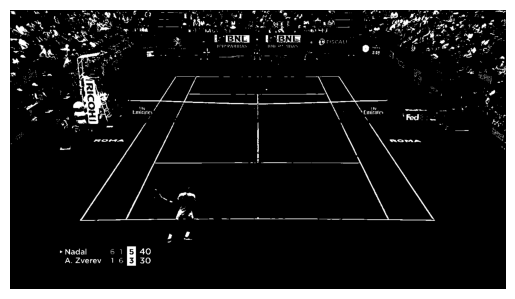

In [12]:
image = images_list[0]
image = cv2.imread(image)
image, lines = detect_lines(image)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

[(0.17057057057057057, 0.1571591557330291, 2.0), (0.8282282282282283, 0.16172276098117513, 2.0), (0.16936936936936936, 0.8365658870507701, 2.0), (0.8276276276276276, 0.8362806617227609, 2.0), (0.25585585585585585, 0.16143753565316601, 2.0), (0.25405405405405407, 0.8371363377067884, 2.0), (0.7423423423423423, 0.15772960638904734, 2.0), (0.7453453453453454, 0.8371363377067884, 2.0), (0.25465465465465464, 0.32087849401026813, 2.0), (0.7471471471471471, 0.3180262407301768, 2.0), (0.25465465465465464, 0.6805476326297776, 2.0), (0.7477477477477478, 0.6814033086138049, 2.0), (0.4984984984984985, 0.311751283513976, 2.0), (0.4996996996996997, 0.6802624073017683, 2.0)]
[[[        286         561]]

 [[       1379         561]]

 [[        286        2935]]

 [[       1379        2935]]

 [[        423         561]]

 [[        423        2935]]

 [[       1242         561]]

 [[       1242        2935]]

 [[        423        1110]]

 [[       1242        1110]]

 [[        423        2386]]

 [

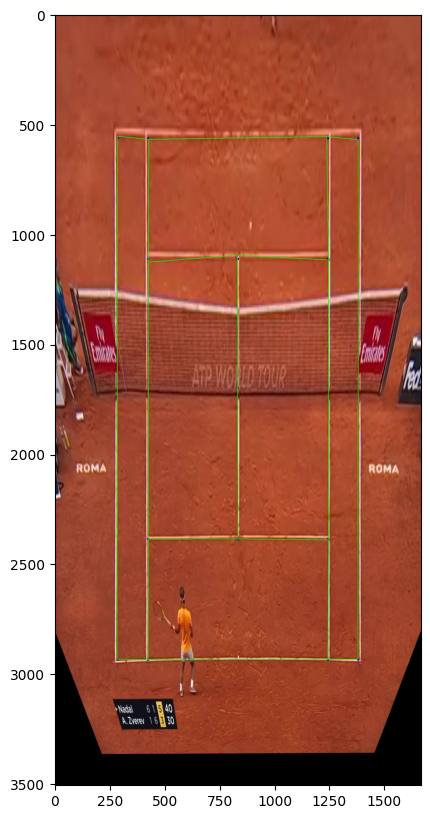

In [20]:
# Map predicted points to reference map.
from court import CourtReference

# Original image
image_path = images_list[0]
image = cv2.imread(image_path)
image_height, image_width, _ = image.shape
# normalize 
ct_keypoints = [(int(x * image_width), int(y * image_height)) for x, y, _ in pred_keypoints[0]]


# Find Homography
court = CourtReference()
homogony_keypoints = court.key_points
H, _ = cv2.findHomography(np.float32(ct_keypoints), np.float32(homogony_keypoints), method=0)
img1_warp = cv2.warpPerspective(image, H, (court.court_total_width, court.court_total_height))

###

# Perform perspective transform on predicted kps
predicted_kps  = np.array([np.expand_dims(np.array([int(x * image_width), int(y * image_height)]), 0) for x, y, _ in pred_keypoints[0]], dtype=np.float32)
orig_trans_kps = cv2.perspectiveTransform(predicted_kps, H)
orig_trans_kps = np.array(orig_trans_kps, dtype=np.int32).reshape((-1, 2)) 
orig_trans_kps = np.c_[orig_trans_kps, np.ones((orig_trans_kps.shape[0], 1)) * 2]
orig_trans_kps = [ (x / img1_warp.shape[1], y / img1_warp.shape[0] , v) for x, y, v in orig_trans_kps ]
print(orig_trans_kps)

# Perform perspective transform on refer_kps
refer_kps = np.array(court.key_points, dtype=np.float32).reshape((-1, 1, 2))
print(refer_kps)
trans_kps = cv2.perspectiveTransform(refer_kps, H)
print(trans_kps)
trans_kps = [ (x[0][0] / img1_warp.shape[1], x[0][1] / img1_warp.shape[0] , 2) for x in trans_kps ]
print(trans_kps)
###

print(court.key_points)
reference_key_points = [(x / img1_warp.shape[1], y / img1_warp.shape[0]) for x, y in court.key_points]

image = plot_keypoints(img1_warp, orig_trans_kps)
image = plot_keypoints(image, reference_key_points, color=(255, 0, 0))
image = plot_lines(image, orig_trans_kps, 'tennis')

plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

[[[        286         561]]

 [[       1379         561]]

 [[        286        2935]]

 [[       1379        2935]]

 [[        423         561]]

 [[        423        2935]]

 [[       1242         561]]

 [[       1242        2935]]

 [[        423        1110]]

 [[       1242        1110]]

 [[        423        2386]]

 [[       1242        2386]]

 [[        832        1110]]

 [[        832        2386]]]
[[[     431.02      173.41]]

 [[     845.57      173.98]]

 [[     191.17      539.82]]

 [[     1085.6      540.55]]

 [[     483.01      173.48]]

 [[     303.41      539.91]]

 [[     793.64      173.91]]

 [[      973.6      540.46]]

 [[     461.04      218.31]]

 [[     815.66      218.78]]

 [[     374.11      395.67]]

 [[     902.78      396.22]]

 [[     638.18      218.54]]

 [[     638.23      395.94]]]
[(0.33673486709594724, 0.2408490498860677, 2), (0.660599946975708, 0.24164127773708768, 2), (0.14935486316680907, 0.7497546725802952, 2), (0.8481026649475097, 0

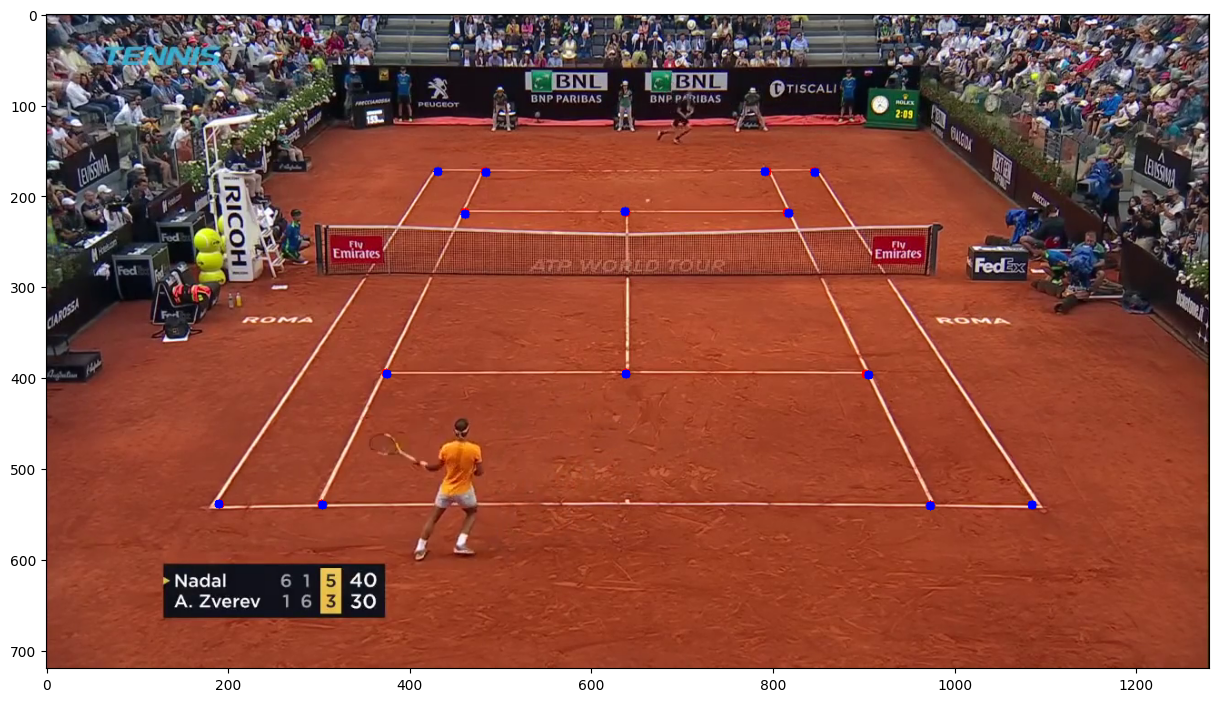

In [21]:
# Map reference keypoints to actual image
image_path = images_list[0]
image = cv2.imread(image_path)
image_height, image_width, _ = image.shape

court = CourtReference()
homogony_keypoints = court.key_points
H, _ = cv2.findHomography(np.float32(homogony_keypoints), np.float32(ct_keypoints), method=0)
img1_warp = cv2.warpPerspective(image, H, (image_width, image_height))


# Perform perspective transform on refer_kps
refer_kps = np.array(court.key_points, dtype=np.float32).reshape((-1, 1, 2))
print(refer_kps)
trans_kps = cv2.perspectiveTransform(refer_kps, H)
print(trans_kps)
trans_kps = [ (x[0][0] / img1_warp.shape[1], x[0][1] / img1_warp.shape[0] , 2) for x in trans_kps ]
print(trans_kps)
###


# image = plot_keypoints(img1_warp, orig_trans_kps)
image = plot_keypoints(image, trans_kps)                            # Refrence Homogony
image = plot_keypoints(image, pred_keypoints[0], color=(255, 0, 0)) # Predicted
# image = plot_lines(image, orig_trans_kps)

plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


## Evaluate Accuracy and Precision
Let's evaluate the overall accuracy and precision of our model.

In [27]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
print("map50-95", metrics.box.map)    # map50-95
print("map50", metrics.box.map50)  # map50
print("map75", metrics.box.map75)  # map75
print("maps", metrics.box.maps)   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.217 🚀 Python-3.11.5 torch-2.1.1+cu121 CPU (AMD EPYC 7742 64-Core Processor)


val: Scanning /home/ltq/Documents/TennisCourtDetectorYoloV8/datasets/tennis_data/labels/val.cache... 2211 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2211/2211 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95):  17%|█▋        | 24/139 [00:19<01:30,  1.27it/s]